## Pm2.5 Prediction using RandomForest Regression

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('./datasets/ratnapark_pm25_after_imputation.csv')

In [6]:
# df = df[[ratnapark_pm25_after_imputation]]
df

,Unnamed: 0,PM2.5,YEAR,MO,DY,HR,PS,WS2M,WD2M,WS10M,WD10M,PRECTOTCORR,RH2M,QV2M,T2M
0,0,75.780952,2022,1,1,0,88.03,0.47,317.6,0.77,319.2,0.0,83.08,6.70,8.85
1,1,56.584127,2022,1,1,1,88.00,0.40,310.0,0.64,313.7,0.0,80.28,6.48,8.86
2,2,49.538710,2022,1,1,2,87.96,0.26,319.6,0.46,323.9,0.0,78.29,6.27,8.74
3,3,47.398438,2022,1,1,3,87.93,0.28,300.3,0.46,306.1,0.0,77.32,6.02,8.32
4,4,42.821875,2022,1,1,4,87.91,0.29,329.0,0.51,330.4,0.0,75.66,5.80,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,8779,74.526667,2024,12,31,19,87.83,0.62,256.0,1.44,253.1,0.0,92.40,8.28,10.37
26300,8780,84.556666,2024,12,31,20,87.85,0.44,262.2,0.92,263.7,0.0,91.04,7.94,9.97
26301,8781,105.226666,2024,12,31,21,87.85,0.45,266.2,1.00,261.4,0.0,91.15,7.68,9.46
26302,8782,107.503333,2024,12,31,22,87.85,0.58,279.0,1.19,274.8,0.0,89.81,7.39,9.11


In [ ]:
df.info()

In [7]:
df_corr_spearman = df.corr(method='spearman', min_periods=1, numeric_only=False,)
df_corr_spearman

,Unnamed: 0,PM2.5,YEAR,MO,DY,HR,PS,WS2M,WD2M,WS10M,WD10M,PRECTOTCORR,RH2M,QV2M,T2M
Unnamed: 0,1.000000,-0.197808,0.001934,0.996507,0.093280,0.002733,0.054760,-0.167860,-0.066283,-0.160762,-0.064294,0.072705,0.480034,0.449683,0.069585
PM2.5,-0.197808,1.000000,0.101194,-0.196439,-0.027757,-0.021775,0.480250,-0.109241,0.074952,-0.136749,0.074351,-0.541216,-0.504956,-0.669180,-0.413898
YEAR,0.001934,0.101194,1.000000,-0.001462,0.001686,0.000000,0.075185,0.032806,-0.048910,0.035923,-0.045850,-0.060163,-0.066121,-0.041568,0.031898
MO,0.996507,-0.196439,-0.001462,1.000000,0.010024,0.000000,0.054900,-0.168705,-0.065090,-0.161596,-0.062934,0.073224,0.481538,0.450525,0.069362
DY,0.093280,-0.027757,0.001686,0.010024,1.000000,0.000000,-0.001832,-0.002653,-0.026204,-0.003914,-0.028100,0.002502,0.007673,0.014987,0.005044
HR,0.002733,-0.021775,0.000000,0.000000,0.000000,1.000000,0.001271,0.108215,0.232124,0.138527,0.230848,0.068712,0.028370,0.105354,0.138847
PS,0.054760,0.480250,0.075185,0.054900,-0.001832,0.001271,1.000000,-0.140867,0.087326,-0.172759,0.085022,-0.634587,-0.238214,-0.594501,-0.627034
WS2M,-0.167860,-0.109241,0.032806,-0.168705,-0.002653,0.108215,-0.140867,1.000000,0.101109,0.987510,0.109457,0.055176,-0.466383,0.005184,0.527016
WD2M,-0.066283,0.074952,-0.048910,-0.065090,-0.026204,0.232124,0.087326,0.101109,1.000000,0.105949,0.977393,-0.176935,-0.123858,-0.161908,-0.038433
WS10M,-0.160762,-0.136749,0.035923,-0.161596,-0.003914,0.138527,-0.172759,0.987510,0.105949,1.000000,0.114365,0.085860,-0.419813,0.037455,0.529221


In [ ]:
df_corr_pearson = df.corr(method='pearson', min_periods=1, numeric_only=False,)
df_corr_pearson

In [8]:
print('Pearson Correlation')
sns.heatmap(df_corr_pearson, annot=True)
sns.set(rc={'figure.figsize': [25, 10]})
plt.show()

Pearson Correlation


NameError: name 'df_corr_pearson' is not defined

Spearman Correlation


<function matplotlib.pyplot.show(close=None, block=None)>

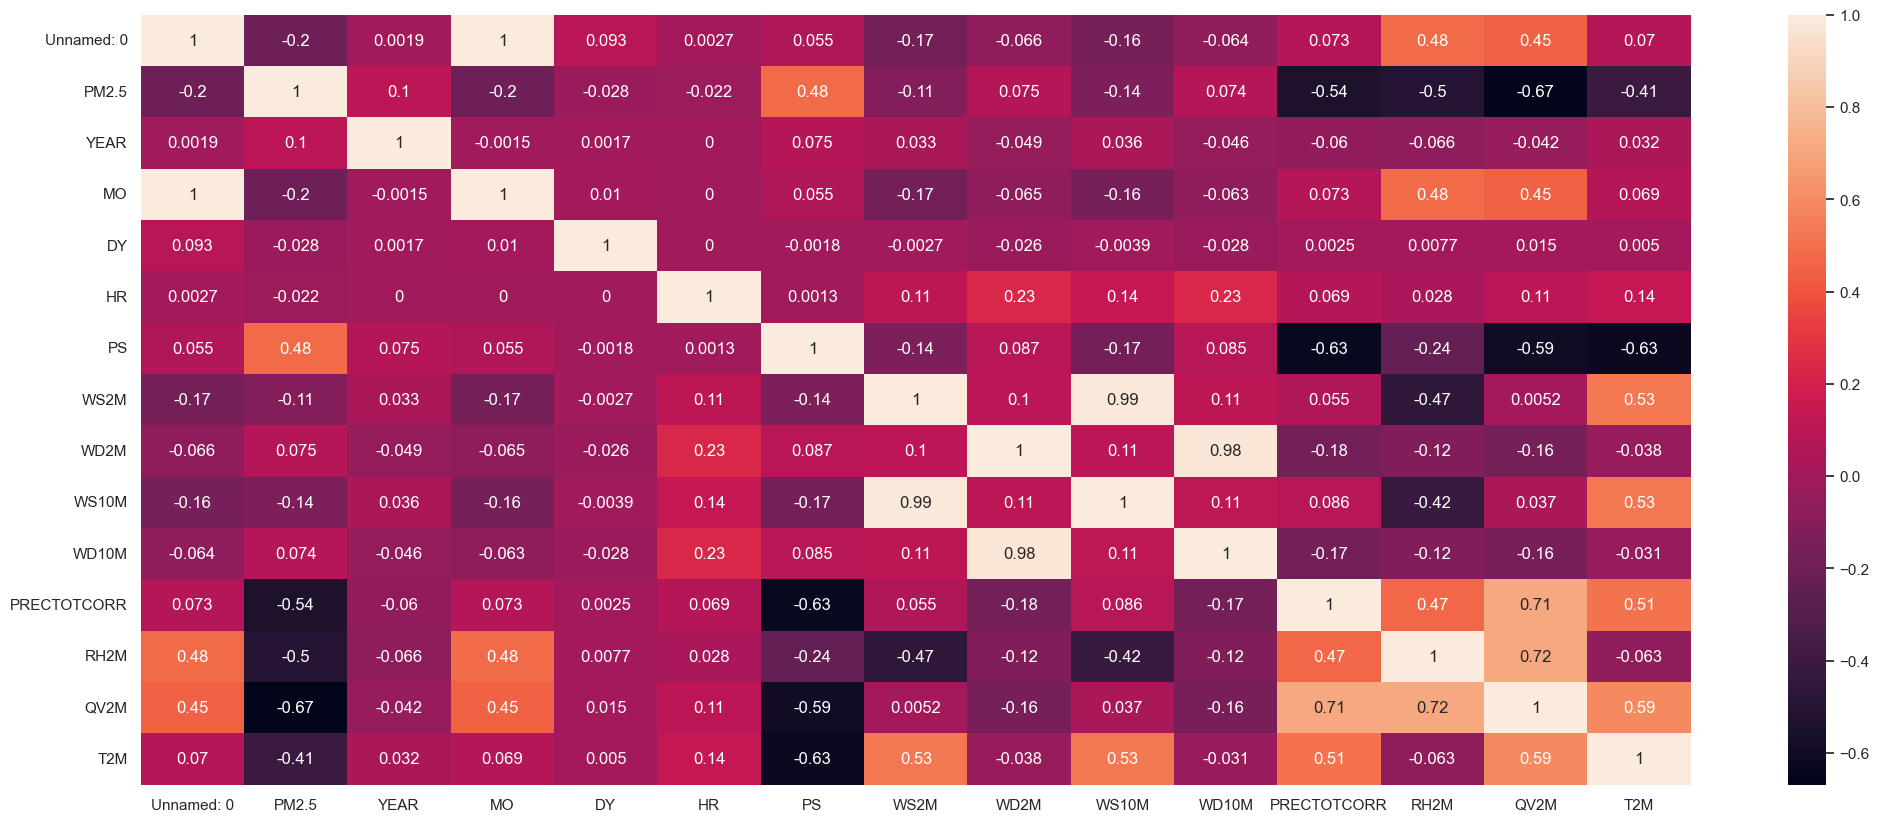

In [10]:
print('Spearman Correlation')
sns.heatmap(df_corr_spearman, annot=True)
sns.set(rc={'figure.figsize': [25, 10]})
plt.show

In [18]:
# Split the Dataset
X = df[['MO',	'DY',	'HR',	'PS',	'WS2M',	'WD2M',	'WS10M', 'WD10M', 'PRECTOTCORR',	'RH2M',	'QV2M',	'T2M']]
y = df['PM2.5']
# X = df[['MO',	'DY',	'HR',]]
# y = df['PM2.5']


In [19]:
X.head()

,MO,DY,HR,PS,WS2M,WD2M,WS10M,WD10M,PRECTOTCORR,RH2M,QV2M,T2M
0,1,1,0,88.03,0.47,317.6,0.77,319.2,0.0,83.08,6.70,8.85
1,1,1,1,88.00,0.40,310.0,0.64,313.7,0.0,80.28,6.48,8.86
2,1,1,2,87.96,0.26,319.6,0.46,323.9,0.0,78.29,6.27,8.74
3,1,1,3,87.93,0.28,300.3,0.46,306.1,0.0,77.32,6.02,8.32
4,1,1,4,87.91,0.29,329.0,0.51,330.4,0.0,75.66,5.80,8.09


In [20]:
y.head()

0    75.780952
1    56.584127
2    49.538710
3    47.398438
4    42.821875
Name: PM2.5, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train

In [22]:
import time

In [32]:
start_time_rf = time.time()

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [33]:
y_pred = model.predict(X_test)
end_time_rf = time.time()

rf_time = end_time_rf - start_time_rf
print(' --- Execution Time ---')
rf_time

 --- Execution Time ---


3.0918710231781006

In [34]:
# Evaluate the Model
# Yearly mean value fill
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 8.92
Mean Squared Error (MSE): 187.54
Root Mean Squared Error (RMSE): 13.69
R² Score: 0.82


In [ ]:
# make prediction on input data
input_data = {
    'MO' : 7,
    'DY' : 9,
    'HR' : 23,
    'PS' : 78.04,
    'WS2M' : 0.82,
    'WD2M' : 35.6,
    'WS10M' : 1.63,
    'WD10M' : 50.5,
    'PRECTOTCORR' : 5.25,
    'RH2M' : 70.49,
    'QV2M' : 16.42,
    'T2M' : 6.96,
    }
# Convert to DataFrame
input_df = pd.DataFrame([input_data])

input_y_pred = model.predict(input_df)
print("\nPredicted value:", input_y_pred)

In [ ]:
a = y_test[:100]
pm_value = a.to_frame().reset_index() # converting series into frame
pm_value = pm_value['PM2.5']
pm_value

In [ ]:
val=[]
b = y_pred[:100]
for i in b:
    val.append(i)

val
# Converting into dataframe
pm_value1= pd.DataFrame(val)
pm_value1
    

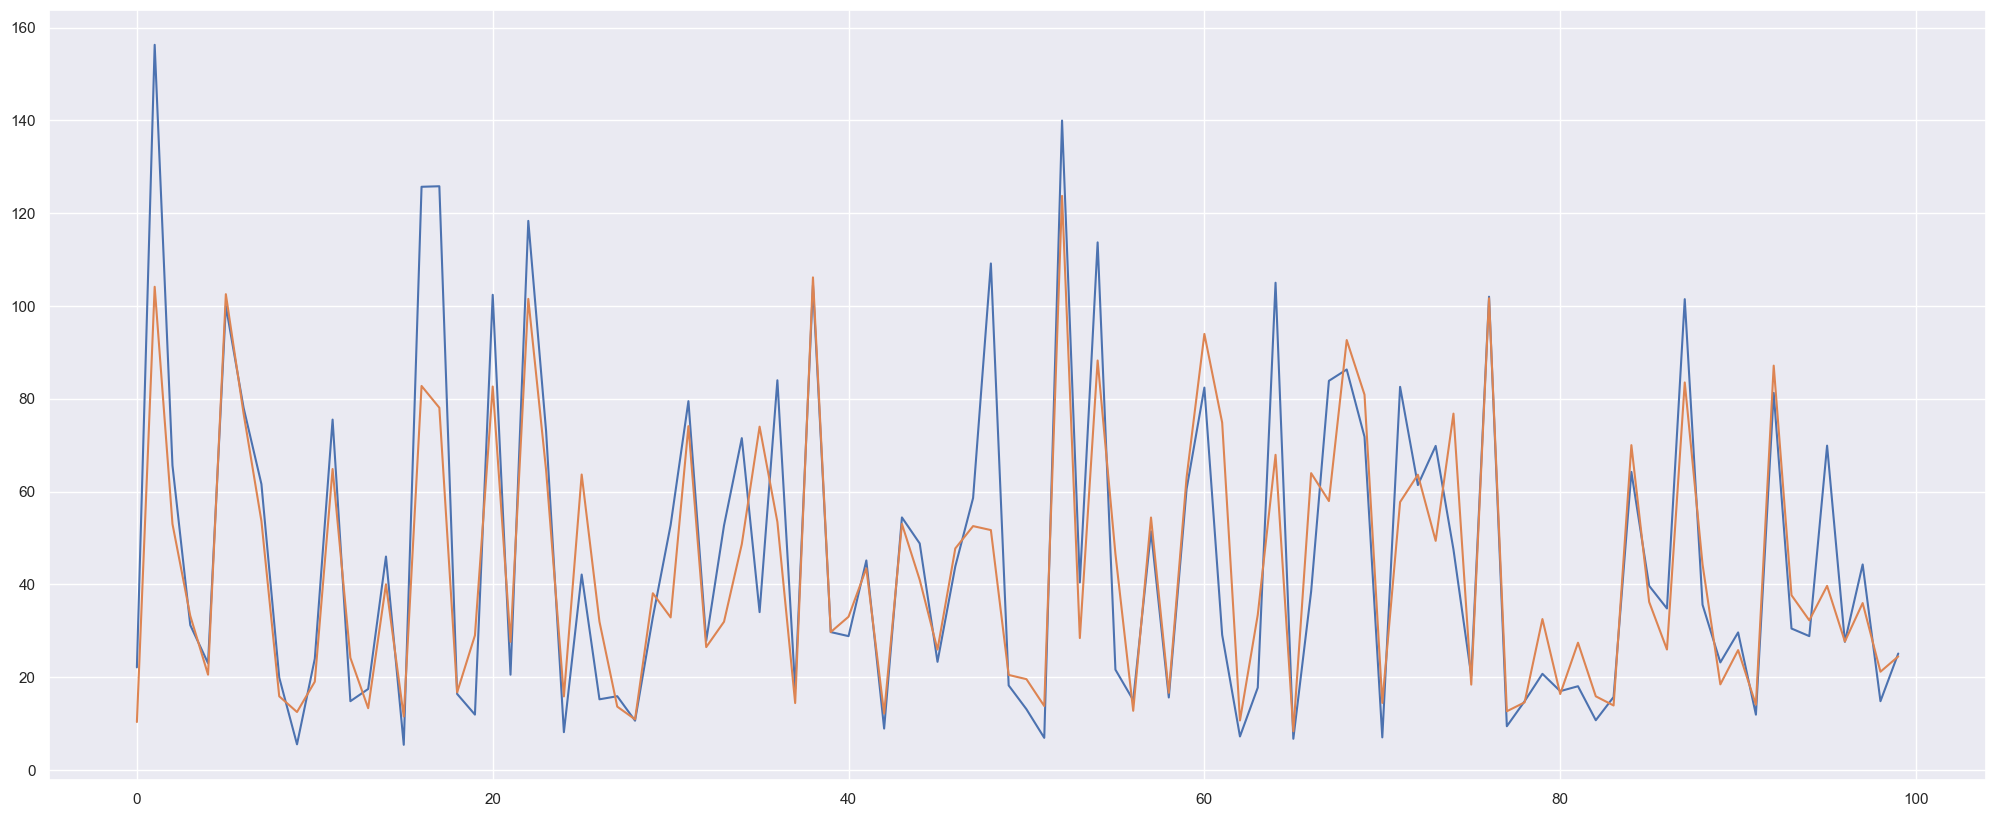

In [107]:
plt.plot(pm_value)
plt.plot(pm_value1)

plt.show()
